# Project 1 - Support Vector Machine Classification

### NAME(S): Bradley Chao and Eric Zhao
### DATE: April 5, 2023

## What will we do?
Using gradient descent, we will build a Support Vector Machine to find the optimal hyperplane that maximizes the margin between two toy data classes.

## What are some use cases for SVMs?

-Classification, regression (time series prediction, etc.), outlier detection, clustering

## How does an SVM compare to other ML algorithms?


![alt text](images/img.png)
Classifiers: (a) Logistic Regression, (b) SVM, and (c) Multi-Layer Perception (MLP)
* As a rule of thumb, SVMs are great for relatively small data sets with fewer outliers.
* Other algorithms (Random forests, deep neural networks, etc.) require more data but almost always develop robust models.
* The decision of which classifier to use depends on your dataset and the general complexity of the problem.
* "Premature optimization is the root of all evil (or at least most of it) in programming." - Donald Knuth, CS Professor (Turing award speech 1974)

## Other Examples

- Learning to use Scikit-learn's SVM function to classify images https://github.com/ksopyla/svm_mnist_digit_classification
- Pulse classification, more useful dataset
https://github.com/akasantony/pulse-classification-svm

## What is a Support Vector Machine?

It's a supervised machine learning algorithm that can be used for both classification and regression problems. But it's usually used for classification. Given two or more labeled data classes, it acts as a discriminative classifier, formally defined by an optimal hyperplane that separates all the classes. New examples mapped into that space can then be categorized based on which side of the gap they fall.

## What are Support Vectors?

![alt text](images/SvmMargin2.jpg "Logo Title Text 1")

Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set; they help us build our SVM.


## What is a hyperplane?

![alt text](images/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

Geometry tells us that a hyperplane is a subspace of one dimension less than its ambient space. For instance, a hyperplane of an n-dimensional space is a flat subset with size $n − 1$. By its nature, it separates the space in half.

## Linear vs nonlinear classification?

Sometimes our data is linearly separable. That means for N classes with M features. We can learn a mapping that is a linear combination. (like $y = mx + b$). Or even a multidimensional hyperplane ($y = x + z + b + q$). No matter how many dimensions/features a set of classes have, we can represent the mapping using a linear function.

But sometimes it is not. Like if there was a quadratic mapping. Luckily for us, SVMs can efficiently perform a non-linear classification using what is called the kernel trick.

![alt text](images/1_mCwnu5kXot6buL7jeIafqQ.png "Logo Title Text 1")

More on this as a Bonus question comes at the end of notebook.

All right, let's get to the building!

# Instructions

In this assignment, you will implement a support vector machine (SVM) from scratch, and you will use your implementation for multiclass classification on the MNIST dataset.


In `implementation.py` implement the SVM class. In the fit function, use `scipy.minimize` ([see documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)) to solve the constrained optimization problem:

$\begin{align*}
& \underset{a}{\text{maximize}}& & \sum_{i=1}^{n}a_{i} - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}a_{i}a_{j}y_{i}y_{j}(x_{i}\cdot x_{j}) \\
& \text{subject to}& & a_{i} \ge 0, i=1,\ldots, n \\
& & & \sum_{i=1}^{n}a_{i}y_{i} = 0
\end{align*}$

__Note__: An SVM is a convex optimization problem. Using  to solve the equation above will be computationally expensive given larger datasets. [CS 168 Convex Optimization](https://www.cs.tufts.edu/t/courses/description/spring2023/CS/168-01) is a course to take later if interested in optimization and the mathematics and intuition that drives it.

In [62]:
import numpy as np
import pandas as pd

from scipy.io import loadmat
from implementation import SVM, linear_kernel, nonlinear_kernel
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt

import implementation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1 - Get Data

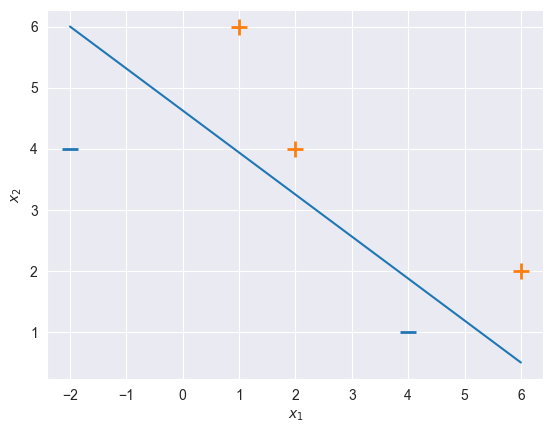

In [63]:
# Input data - of the form [Bias term, x_1 value, x_2 value]
X = np.array([
    [1, -2, 4,],
    [1, 4, 1,],
    [1, 1, 6,],
    [1, 2, 4,],
    [1, 6, 2,],
])

# Associated output labels - first 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

# Let's plot these examples on a 2D graph!
# Plot the negative samples (the first 2)
plt.scatter(X[:,1][y==-1], X[:,2][y==-1], s=120, marker='_', linewidths=2)
# Plot the positive samples (the last 3)
plt.scatter(X[:,1][y==1], X[:,2][y==1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is separating the two classes.
# we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

### SVM basics
SVM using scikit-learn.

In [64]:
result = SVC(kernel="linear")
result.fit(X, y.ravel())

print("scikit-learn indices of support vectors:", result.support_)

scikit-learn indices of support vectors: [0 1 3 4]


## Implement and test SVM to sklearn's version (20 points)
Compare the indices of support vectors from scikit-lean with `implementation.py` using toy data.

In [65]:
result = SVC(kernel="linear")
result.fit(X, y)

print("scikit-learn indices of support vectors:", result.support_)

svm = SVM(kernel=linear_kernel)
svm.fit(X, y)

scikit-learn indices of support vectors: [0 1 3 4]


In [66]:
print("implementation.py indices of support vectors:", \
      np.array(range(y.shape[0]))[svm.a>1e-8])

if (result.support_ != np.array(range(y.shape[0]))[svm.a>1e-8]).all():
    raise Exception("The calculation is wrong")

implementation.py indices of support vectors: [0 1 3 4]


Compare the weights assigned to the features from scikit-lean with `implementation.py`.

In [67]:
# other sections were done for you, specify the variables to print, find the difference, and check it is within reasonable error from that of sklearn's version.
diff = np.abs(result.coef_ - svm.w)

print("scikit-learn weights assigned to the features:", result.coef_)
print("implementation.py weights assigned to the features:", svm.w)

if (diff > 1e-3).any():
    raise Exception("The calculation is wrong")

scikit-learn weights assigned to the features: [[0.         0.5        0.99969451]]
implementation.py weights assigned to the features: [2.77555756e-17 4.99918728e-01 1.00003855e+00]


Compare the bias weight from scikit-lean with `implementation.py`.

In [68]:
print("scikit-learn bias weight:", result.intercept_)
print("implementation.py bias weight:", svm.b)

diff = abs(result.intercept_ - svm.b)
if (diff > 1e-3).all():
    raise Exception("The calculation is wrong")

scikit-learn bias weight: [-3.99915989]
implementation.py bias weight: -3.999902822026268


Compare the predictions from scikit-lean with `implementation.py`.

In [69]:
X_test = np.array([
    [4, 4, -1],
    [1, 3, -1]
    ])
print("scikit-learn predictions:", result.predict(X_test))
print("implementation.py predictions:", svm.predict(X_test))

if (svm.predict(X_test) != result.predict(X_test)).all():
    raise Exception("The calculation is wrong")

scikit-learn predictions: [-1 -1]
implementation.py predictions: [-1. -1.]


### Using SKLearns SVM (*one-versus-the-rest*)

You can load the data with `scipy.io.loadmat`, which will return a Python dictionary containing the test and train data and labels.

In [70]:
mnist = loadmat('data/MNIST.mat')
train_samples = mnist['train_samples']
train_samples_labels = mnist['train_samples_labels']
test_samples = mnist['test_samples']
test_samples_labels = mnist['test_samples_labels']

## Explore the MNIST dataset
Explore the MNIST dataset:

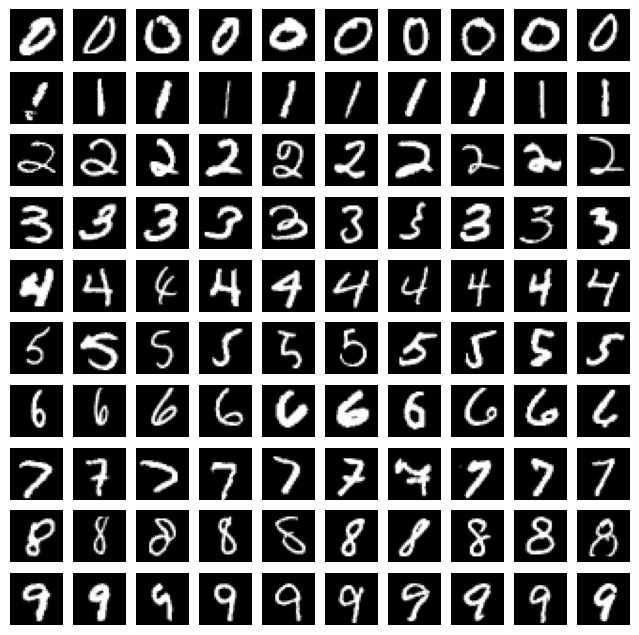

In [12]:
# Set up a grid of plots to display the samples.
fig, axs = plt.subplots(10, 10, figsize=(8, 8))

# Loop over the unique classes and visualize some samples of each class.
for i in range(10):
    # Obtain samples of class i
    class_i = np.where(train_samples_labels == i)[0]
    
    # Select sample of 10 from each equivalence class
    selected_axes = np.random.choice(class_i, size = 10, replace = False)
        
    # Reshape samples to properly output
    samples = train_samples[selected_axes].reshape(-1, int(np.sqrt(train_samples.shape[1])), int(np.sqrt(train_samples.shape[1])))
    
    for j, sample in enumerate(samples):
        axs[i, j].imshow(sample, cmap = 'gray')
        axs[i, j].axis('off')

### *one-versus-the-rest* (15 Points) and analysis
Using your implementation, compare multiclass classification performance of *one-versus-the-rest*

**Create your own implementation of *one-versus-the-rest* and *one-versus-one*. Do not use sklearns multiclass SVM.**

In [41]:
# Save all the prediction probability by predict_proba() for the following function
# NT for no hyperparameter tuning
train_probas_NT = []
test_probas_NT = []

# For every equivalence class ranging from 0 to 9
for i in range(10):
    
    # In the training portion, separate by class
    train_class_i = np.where(i == train_samples_labels)[0]
    train_outside_class_i = np.where(i != train_samples_labels)[0]    
        
    # Create binary array which is 1 if it's in the class, 0 if not
    y_train_i = np.zeros(len(train_samples))
    y_train_i[train_class_i] = 1
    y_train_i[train_outside_class_i] = 0
        
    # In the testing portion, find the indices of all samples of the class
    test_class_i = np.where(i == test_samples_labels)[0]
    test_outside_class_i = np.where(i != test_samples_labels)[0]
    
    # Create binary array which is 1 if it's in the class, 0 if not
    y_test_i = np.zeros(len(test_samples_labels))
    y_test_i[test_class_i] = 1
    y_test_i[test_outside_class_i] = 0
            
    # Note on Piazza to use sklearn SVM and not our own implementation
    svm = SVC(kernel = 'linear', probability = True, random_state = 42)
    svm.fit(train_samples, y_train_i)
        
    train_probas_NT.append(svm.predict_proba(train_samples)[:,1])
    test_probas_NT.append(svm.predict_proba(test_samples)[:,1])
    
    print("Class vs Rest:", i)
    print(svm.score(train_samples, y_train_i))
    print(svm.score(test_samples, y_test_i))

Class vs Rest: 0
0.99475
0.985
Class vs Rest: 1
0.9905
0.994
Class vs Rest: 2
0.97825
0.97
Class vs Rest: 3
0.9745
0.962
Class vs Rest: 4
0.9815
0.977
Class vs Rest: 5
0.97425
0.966
Class vs Rest: 6
0.98875
0.98
Class vs Rest: 7
0.985
0.971
Class vs Rest: 8
0.9635
0.951
Class vs Rest: 9
0.965
0.961


Determine the accuracy

In [42]:
from sklearn.metrics import accuracy_score

# Convert to numpy array
train_probas_NT = np.array(train_probas_NT)
test_probas_NT = np.array(test_probas_NT)

train_preds = np.zeros(len(train_samples_labels))
test_preds = np.zeros(len(test_samples_labels))

for i in range(4000):
    max_train_index = np.argmax(train_probas_NT[:, i])
    train_preds[i] = max_train_index
    
for i in range(1000):
    max_test_index = np.argmax(test_probas_NT[:, i])
    test_preds[i] = max_test_index

train_accuracy = accuracy_score(train_samples_labels, train_preds)
test_accuracy = accuracy_score(test_samples_labels, test_preds)
    
    
print("Train accuracy: {:.2f}".format(100*train_accuracy))
print("Test accuracy: {:.2f}".format(100*test_accuracy))

Train accuracy: 91.85
Test accuracy: 88.60


The parameter $C>0$ controls the tradeoff between the size of the margin and the slack variable penalty. It is analogous to the inverse of a regularization coefficient. Include in your report a brief discussion of how you found an appropriate value.

In [1]:
# Save all the prediction probability by predict_proba() for the following function

train_accuracies = list()
test_accuracies = list()

for C in np.logspace(-5, 5, 51):
    train_probas = []
    test_probas = []

    # For every equivalence class ranging from 0 to 9
    for i in range(10):

        # In the training portion, separate by class
        train_class_i = np.where(i == train_samples_labels)[0]
        train_outside_class_i = np.where(i != train_samples_labels)[0]    

        # Create binary array which is 1 if it's in the class, 0 if not
        y_train_i = np.zeros(len(train_samples))
        y_train_i[train_class_i] = 1
        y_train_i[train_outside_class_i] = 0

        # In the testing portion, find the indices of all samples of the class
        test_class_i = np.where(i == test_samples_labels)[0]
        test_outside_class_i = np.where(i != test_samples_labels)[0]

        # Create binary array which is 1 if it's in the class, 0 if not
        y_test_i = np.zeros(len(test_samples_labels))
        y_test_i[test_class_i] = 1
        y_test_i[test_outside_class_i] = 0

        # Note on Piazza to use sklearn SVM and not our own implementation
        svm = SVC(C = C, kernel = 'linear', probability = True, random_state = 42)
        svm.fit(train_samples, y_train_i)

        train_probas.append(svm.predict_proba(train_samples)[:,1])
        test_probas.append(svm.predict_proba(test_samples)[:,1])

    # Convert to numpy array
    train_probas = np.array(train_probas)
    test_probas = np.array(test_probas)

    train_preds = np.zeros(len(train_samples_labels))
    test_preds = np.zeros(len(test_samples_labels))

    for i in range(4000):
        max_train_index = np.argmax(train_probas[:, i])
        train_preds[i] = max_train_index

    for i in range(1000):
        max_test_index = np.argmax(test_probas[:, i])
        test_preds[i] = max_test_index
        
        
    train_accuracies.append(accuracy_score(train_samples_labels, train_preds))
    test_accuracies.append(accuracy_score(test_samples_labels, test_preds))

print(np.logspace(-5, 5, 51))
print(train_accuracies)
print(test_accuracies)

NameError: name 'np' is not defined

In [43]:
# index of the maxi test accuracy
max_index = test_accuracies.index(max(test_accuracies))

print("Best C value:", np.logspace(-5, 5, 51)[max_index])
print("Corresponding training accuracy:", train_accuracies[max_index])
print("Corresponding test accuracy:", test_accuracies[max_index])

Best C value: 3.9810717055349776
Corresponding training accuracy: 0.936
Corresponding test accuracy: 0.893


Provide details on how you found an appropriate value.

To find the appropriate value of C for our SVM model, we performed hyperparameter tuning using a wide range of values, specifically by employing np.logspace(-5, 5, 51). This method covers several orders of magnitude, allowing us to assess the performance of the model across a diverse set of values.

For each value of C, we trained a one-versus-the-rest model and evaluated its accuracy on both the training and test sets. Our aim was to identify a value of C that resulted in high accuracy on the training set while maintaining strong generalization, as evidenced by high test accuracy.

We observed that as C increased to a certain point, the accuracy on both the training and test sets improved. However, as C continued to grow, test accuracy began to decline, despite training accuracy still increasing. This suggested that larger values of C may lead to overfitting, fitting the training data too closely and generalizing poorly to new, unseen data.

We ultimately selected C = 3.98107 as the appropriate value, as it provided the highest test accuracy (0.893) and very high training accuracy (0.936). By choosing this value, we maximized the model's performance on unseen data while maintaining a high level of accuracy on the training set. Smaller values of C resulted in lower accuracy on both the training and test sets, offering no benefits over our chosen value. On the other hand, larger values of C may lead to overfitting and reduced generalization, as indicated by the decrease in test accuracy. Thus, C = 3.98107 represents a suitable balance between fitting the training data and generalizing to new data.

Plot accuracies for train and test using logspace for x-axis (i.e., $C$ values)

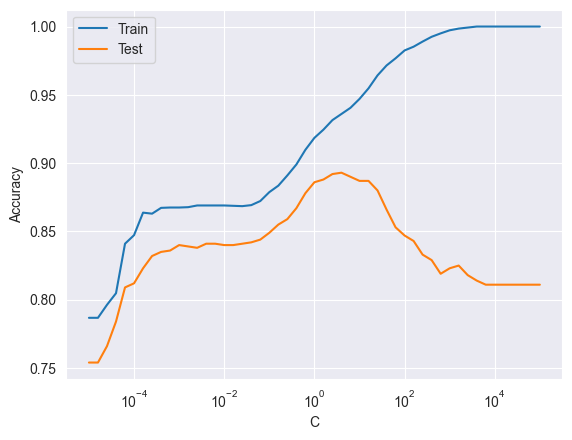

In [44]:
c_vals = np.logspace(-5, 5, 51)
plt.plot(c_vals, train_accuracies, label='Train')
plt.plot(c_vals, test_accuracies, label='Test')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

What does this graph tell us about the importance of our C value?

\# TODO: Analyze the plot above: 

The graph illustrates the relationship between C and the accuracy on both training and testing sets. For moderately sized C values, both training and test accuracies increase as C increases. However, when C becomes very large, training accuracy continues to rise, while test accuracy declines significantly. This demonstrates the importance of carefully selecting the C value to avoid underfitting or overfitting.

Small C values result in a larger margin, which often leads to underfitting. In this case, the model doesn't capture the underlying patterns in the data, resulting in low accuracy on both the training and test sets. On the other hand, large C values lead to a smaller margin and a higher penalty for misclassified data points. While this approach improves training accuracy, it often results in overfitting, where the model becomes too specialized to the training data and doesn't generalize well to unseen data, leading to a decline in test accuracy.

The graph supports the analysis we provided above as we choose a healthy balance between two extremes.

### (10 Points)
In addition to calculating percent accuracy, generate multiclass [confusion matrices](https://en.wikipedia.org/wiki/confusion_matrix) as part of your analysis.

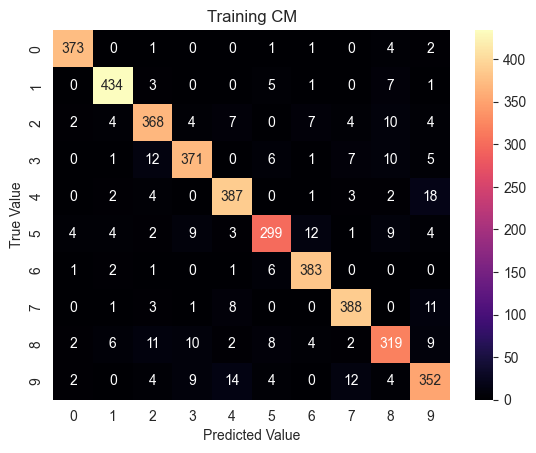

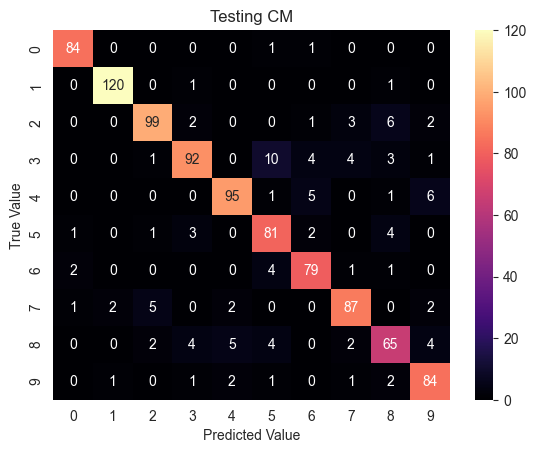

In [45]:
import seaborn as sns

train_matrix = confusion_matrix(train_samples_labels, train_preds)
sns.heatmap(train_matrix, annot=True, cmap="magma", fmt="d")
plt.title("Training CM")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

test_matrix = confusion_matrix(test_samples_labels, test_preds)
sns.heatmap(test_matrix, annot=True, cmap="magma", fmt="d")
plt.title("Testing CM")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

### Evaluation (15 points)

Now we will report our results and compare to other algorithms. Usually compare with a handful
Logisitic regression

**Create your own implementation of *one-versus-the-rest* and *one-versus-one*. Do not use sklearns multiclass Logistic Regression.**

In [71]:
# Perform one vs rest
log_train_probas = []
log_test_probas = []

for i in range(10):

    # In the training portion, separate by class
    train_class_i = np.where(i == train_samples_labels)[0]
    train_outside_class_i = np.where(i != train_samples_labels)[0]

    # Create binary array which is 1 if it's in the class, 0 if not
    y_train_i = np.zeros(len(train_samples))
    y_train_i[train_class_i] = 1
    y_train_i[train_outside_class_i] = 0

    # In the testing portion, find the indices of all samples of the class
    test_class_i = np.where(i == test_samples_labels)[0]
    test_outside_class_i = np.where(i != test_samples_labels)[0]

    # Create binary array which is 1 if it's in the class, 0 if not
    y_test_i = np.zeros(len(test_samples_labels))
    y_test_i[test_class_i] = 1
    y_test_i[test_outside_class_i] = 0

    # Note on Piazza to use sklearn SVM and not our own implementation
    logreg = LogisticRegression(random_state = 42)
    logreg.fit(train_samples, y_train_i)

    log_train_probas.append(logreg.predict_proba(train_samples)[:,1])
    log_test_probas.append(logreg.predict_proba(test_samples)[:,1])

    print("Class vs Rest:", i)
    print(logreg.score(train_samples, y_train_i))
    print(logreg.score(test_samples, y_test_i))


log_train_probas = np.array(log_train_probas)
log_test_probas = np.array(log_test_probas)

train_preds = np.zeros(len(train_samples_labels))
test_preds = np.zeros(len(test_samples_labels))

for i in range(4000):
    max_train_index = np.argmax(log_train_probas[:, i])
    train_preds[i] = max_train_index

for i in range(1000):
    max_test_index = np.argmax(log_test_probas[:, i])
    test_preds[i] = max_test_index


log_train_accuracy = accuracy_score(train_samples_labels, train_preds)
log_test_accuracy = accuracy_score(test_samples_labels, test_preds)


print("Train accuracy: {:.2f}".format(100*log_train_accuracy))
print("Test accuracy: {:.2f}".format(100*log_test_accuracy))

Class vs Rest: 0
0.99125
0.985
Class vs Rest: 1
0.98725
0.993
Class vs Rest: 2
0.96925
0.967
Class vs Rest: 3
0.968
0.959
Class vs Rest: 4
0.977
0.971
Class vs Rest: 5
0.95925
0.945
Class vs Rest: 6
0.9815
0.976
Class vs Rest: 7
0.98025
0.969
Class vs Rest: 8
0.9525
0.946
Class vs Rest: 9
0.95475
0.961
Train accuracy: 89.65
Test accuracy: 87.00


Create a table comparing model accuracy on train and test data.

In [72]:
# Define the data
data = [["Original SVM (no C)", train_accuracy * 100, test_accuracy * 100],
        ["Logistic Regression", log_train_accuracy * 100, log_test_accuracy * 100]]

# Define the headers
headers = ["Method", "Train Acc.(%)", "Test Acc.(%)"]

# Print the headers
print("{:<25} {:<15} {:<15}".format(headers[0], headers[1], headers[2]))
print("-" * 55)

# Print the data
for row in data:
    print("{:<25} {:<15.2f} {:<15.2f}".format(row[0], row[1], row[2]))

Method                    Train Acc.(%)   Test Acc.(%)   
-------------------------------------------------------
Original SVM (no C)       91.85           88.60          
Logistic Regression       89.65           87.00          


Create 9 graphs (one for each label) with two ROC curves (one for each model).


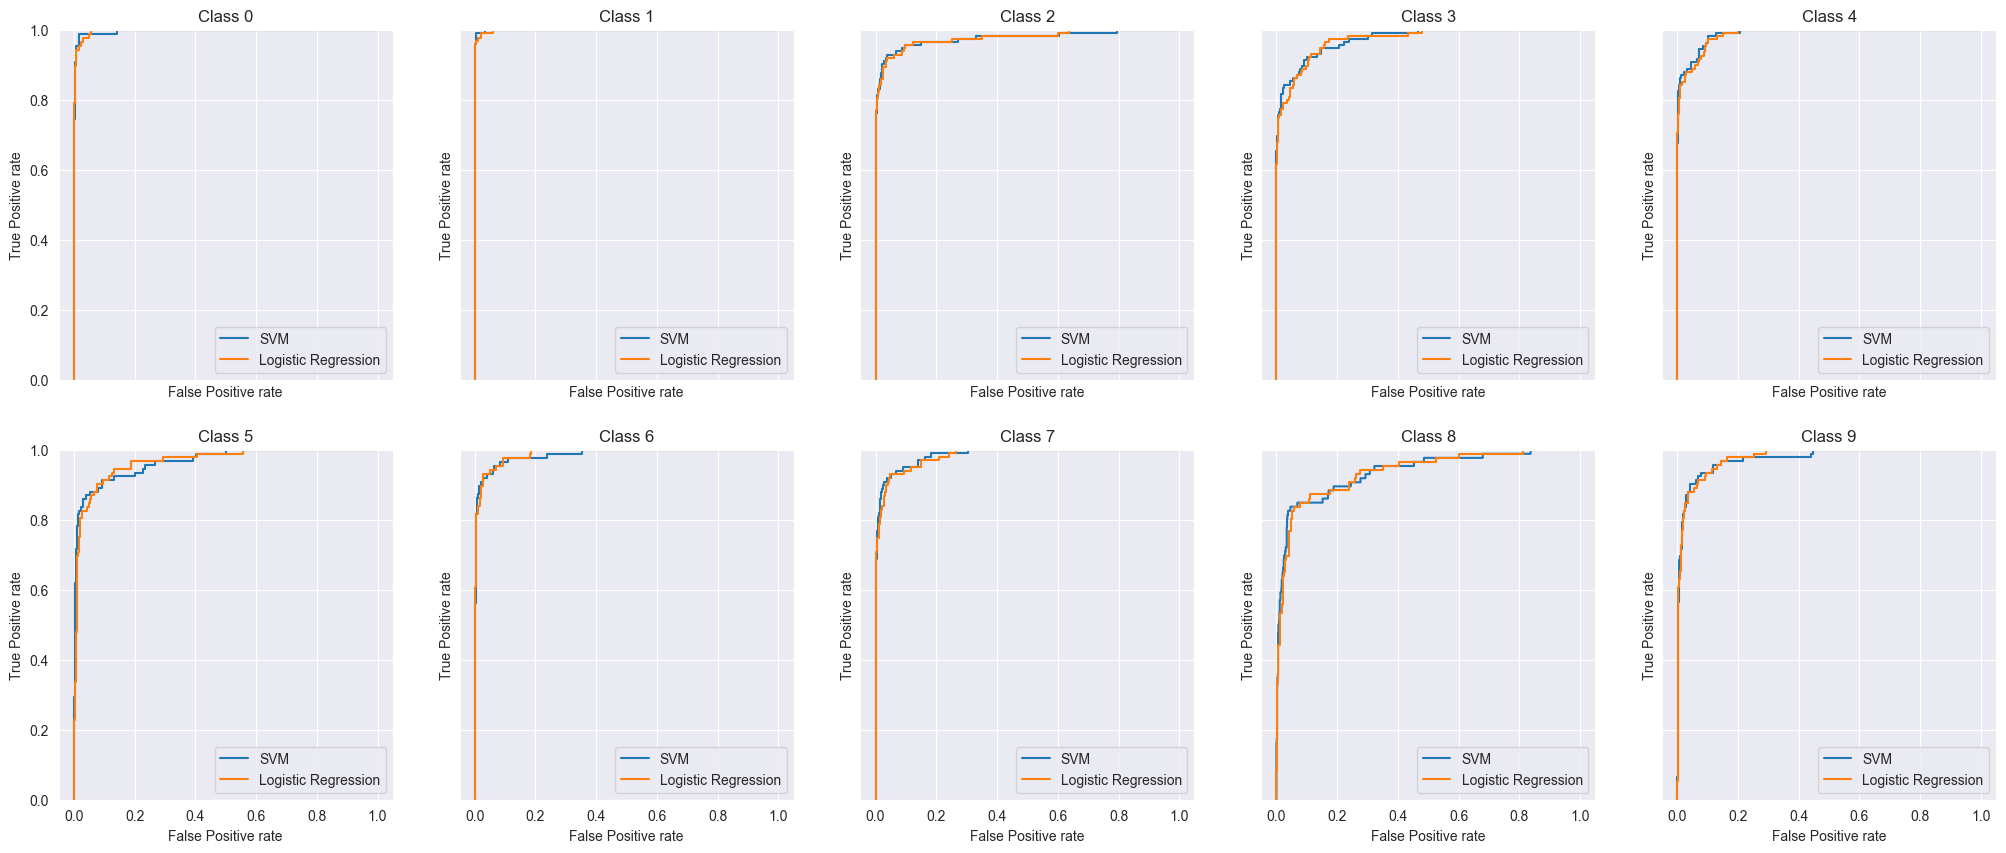

In [61]:
import sklearn

fig, axes = plt.subplots(2, 5, figsize=(25, 10), sharex=True, sharey=True)
axes = axes.flatten()

for index, ax in enumerate(axes[:10]):
    # Create binary array which is 1 if it's in the class, 0 if not
    y_test_i = np.where(test_samples_labels == index, 1, 0)

    # Compute ROC curve for SVM
    S_fpr, S_tpr, _ = sklearn.metrics.roc_curve(y_test_i, test_probas_NT[index])

    # Compute ROC curve for Logistic Regression
    L_fpr, L_tpr, _ = sklearn.metrics.roc_curve(y_test_i, log_test_probas[index])

    # Plot ROC curves
    ax.plot(S_fpr, S_tpr, label='SVM')
    ax.plot(L_fpr, L_tpr, label='Logistic Regression')

    # Configure plot appearance
    ax.set_ylim([0, 1])
    ax.legend(loc='lower right')
    ax.set_xlabel("False Positive rate")
    ax.set_ylabel("True Positive rate")
    ax.set_title(f'Class {index}')

plt.show()

# BONUS (+5 points): Non-linear kernel
## Intuition Behind Kernels
The SVM classifier obtained by solving the convex Lagrange dual of the primal max-margin SVM formulation is as follows:

$$ f(x) = \sum_{i=1}^N\alpha_i\cdot y_i\cdot\mathrm{K}(x,x_i)+b,$$

where $N$ is the number of support vectors.

If you know the intuition behind a linear discriminant function, the non-parametric SVM classifier above is very easy to understand. Instead of imagining the original features of each data point, consider a transformation to a new feature space where the data point has $N$ features, one for each support vector. The value of the $i^{th}$ feature is equal to the value of the kernel between the $i^{th}$ support vector and the data point is classified. The original (possibly non-linear) SVM classifier is like any other linear discriminant in this space.

Note that after the transformation, the original features of the data point are irrelevant. Its dot products with support vectors (special data points chosen by the SVM optimization algorithm) represent it only. One of my professors used a loose analogy while explaining this idea: A person has seen lakes, rivers, streams, fords, etc., but has never seen the sea. How would you explain to this person what a sea is? By relating the amount of water in an ocean to that found in a water body, the person already knows, etc.

In some instances, like the RBF kernel, defining the transformed features in terms of the original features of a data point leads to an infinite-dimensional representation. Unfortunately, though this an awe-inspiring fact often mentioned while explaining how powerful SVMs are, it drops in only after repeated encounters with the idea ranging from introductory machine learning to statistical learning theory.


## Intuition Behind Gaussian Kernels

The Gaussian/RBF kernel is as follows:

$$ \mathrm{K}(x,y)=exp(−\frac{||x−y||^2}{2\sigma^2})$$


Like any other kernel, we can understand the RBF kernel regarding feature transformation via the dot products given above. However, the intuition that helps best when analyzing the RBF kernel is that of the Gaussian distribution (as provided by [Akihiro Matsukawa](https://www.quora.com/profile/Akihiro-Matsukawa)).

The Gaussian kernel computed with a support vector is an exponentially decaying function in the input feature space, the maximum value of which is attained at the support vector and which decays uniformly in all directions around the support vector, leading to hyper-spherical contours of the kernel function. The SVM classifier with the Gaussian kernel is simply a weighted linear combination of the kernel function computed between a data point and each support vector. The role of a support vector in the classification of a data point gets tempered with $\alpha$, the global prediction usefulness of the support vector, and $\mathrm{K}(x,y)$, the local influence of a support vector in prediction at a particular data point.

In the 2D feature space, each support vector's kernel function's heat map decay away from the support vector and the resulting classifier (see the following figure).


## Notion of Universal Kernels

(This comes from learning theory, it could be more intuitive, but good to know.)

Gaussian kernels are universal kernels, i.e., their use with appropriate regularization guarantees a globally optimal predictor, which minimizes a classifier's estimation and approximation errors. Here, we incur approximation error by limiting the space of classification models over which the search space. Estimation error refers to errors in estimating the model parameters.


## Intuition Behind Gaussian Kernels

The Gaussian/RBF kernel is as follows:

$$ \mathrm{K}(x,y)=exp(−\frac{||x−y||^2}{2\sigma^2})$$


Like any other kernel, we can understand the RBF kernel regarding feature transformation via the dot products given above. However, the intuition that helps best when analyzing the RBF kernel is that of the Gaussian distribution (as provided by [Akihiro Matsukawa](https://www.quora.com/profile/Akihiro-Matsukawa)).

The Gaussian kernel computed with a support vector is an exponentially decaying function in the input feature space, the maximum value of which is attained at the support vector and which decays uniformly in all directions around the support vector, leading to hyper-spherical contours of the kernel function. The SVM classifier with the Gaussian kernel is simply a weighted linear combination of the kernel function computed between a data point and each support vector. The role of a support vector in the classification of a data point gets tempered with $\alpha$, the global prediction usefulness of the support vector, and $\mathrm{K}(x,y)$, the local influence of a support vector in prediction at a particular data point.

In the 2D feature space, each support vector's kernel function's heat map decay away from the support vector and the resulting classifier (see the following figure).

![gkernel in 2D](images/gkernel-2d.jpeg " kernel function of each support vector")


### Notion of Universal Kernels
(This comes from learning theory, it could be more intuitive, but good to know.)

Gaussian kernels are universal kernels, i.e., their use with appropriate regularization guarantees a globally optimal predictor, which minimizes a classifier's estimation and approximation errors. Here, we incur approximation error by limiting the space of classification models over which the search space. Estimation error refers to errors in estimating the model parameters.


Implement `nonlinear_kernel()` in `implementation.py`, use it, and compare with others (repeat above for SVM using non-linear kernel and do analysis).

In [ ]:
# (Bonus) TODO 